<a href="https://colab.research.google.com/github/sanjay2097/airbnb-analysis/blob/main/Airbnb_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

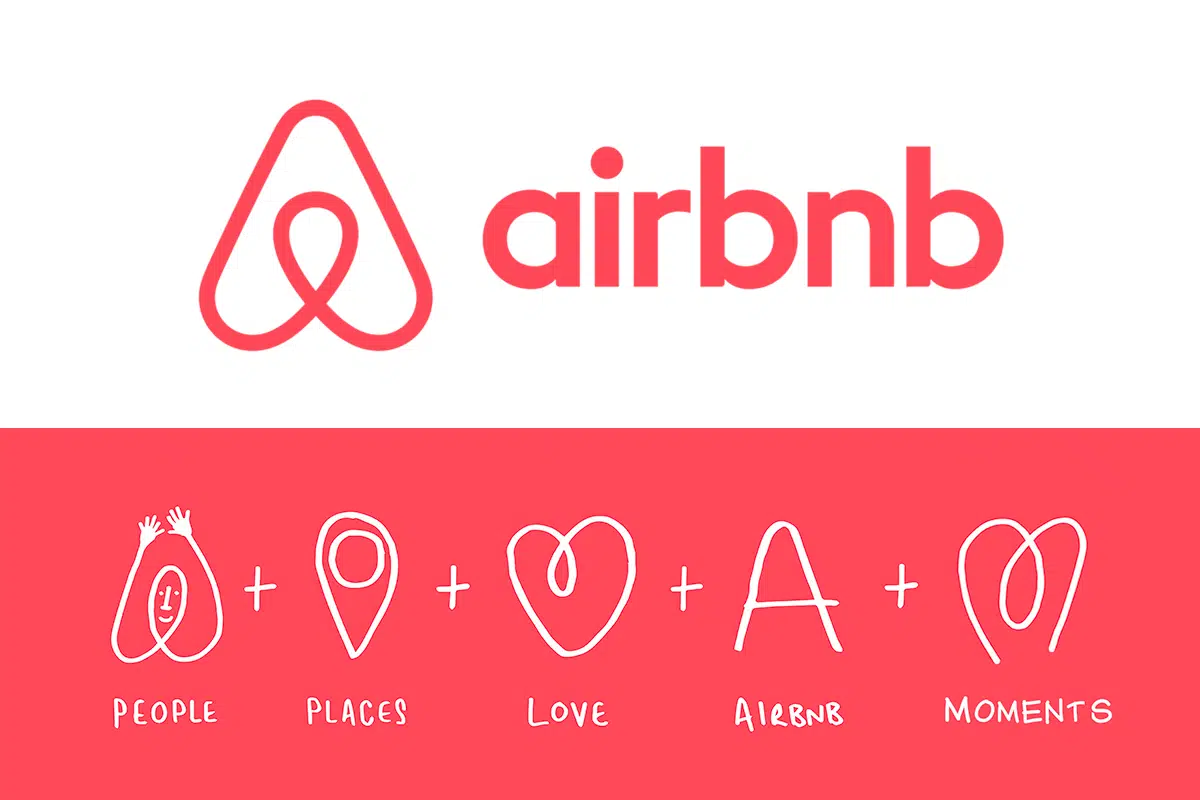

**Airbnb Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')


**Preliminary Analysis**

In [3]:
#Checcking the info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We can see that we are provided with 16 column of different attributes in the dataset containing around 48895 records

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
#Checking first few records to get familiar with dataset 
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Handling Missing Values**

In [6]:
#Looking at the head of the dataset we already were able to notice some NaN values
#Therefore need to examine missing values further before continuing with analysis

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

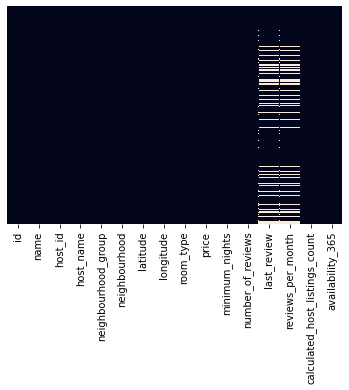

In [7]:
#Heatpmap of missing or NAN values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Maximum missing values are concentrated in 'last_review' and 'reviews_per_month' columns

In [8]:
#Replacing null values with 0

df.fillna({'reviews_per_month':0}, inplace=True)

#Removing last review and name column since its not relevant to our analysis 
df.drop('last_review',inplace=True,axis=1)
df.drop('name',inplace=True,axis=1)

#Removing records where host name is null
df = df[df['host_name'].notna()]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48874 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48874 non-null  int64  
 1   host_id                         48874 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48874 non-null  object 
 4   neighbourhood                   48874 non-null  object 
 5   latitude                        48874 non-null  float64
 6   longitude                       48874 non-null  float64
 7   room_type                       48874 non-null  object 
 8   price                           48874 non-null  int64  
 9   minimum_nights                  48874 non-null  int64  
 10  number_of_reviews               48874 non-null  int64  
 11  reviews_per_month               48874 non-null  float64
 12  calculated_host_listings_count  

In [10]:
#Checking for duplicated values
df.id.duplicated().sum()

0

In [11]:
# Checking available datatype 
df.dtypes

id                                  int64
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [12]:
# Analysing variables with numeric datatype
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.887400e+04,4.887400e+04,48874.000000,48874.000000,48874.000000,48874.000000,48874.000000,48874.000000,48874.000000,48874.000000
mean,1.901988e+07,6.762157e+07,40.728946,-73.952172,152.738634,7.031387,23.266358,1.090785,7.146458,112.793755
std,1.098318e+07,7.861415e+07,0.054529,0.046156,240.199728,20.514423,44.544330,1.597119,32.959378,131.619934
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.474068e+06,7.823258e+06,40.690100,-73.983078,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967936e+07,3.079257e+07,40.723065,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915342e+07,1.074344e+08,40.763110,-73.936273,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Geospatial Visualization of Airbnb**

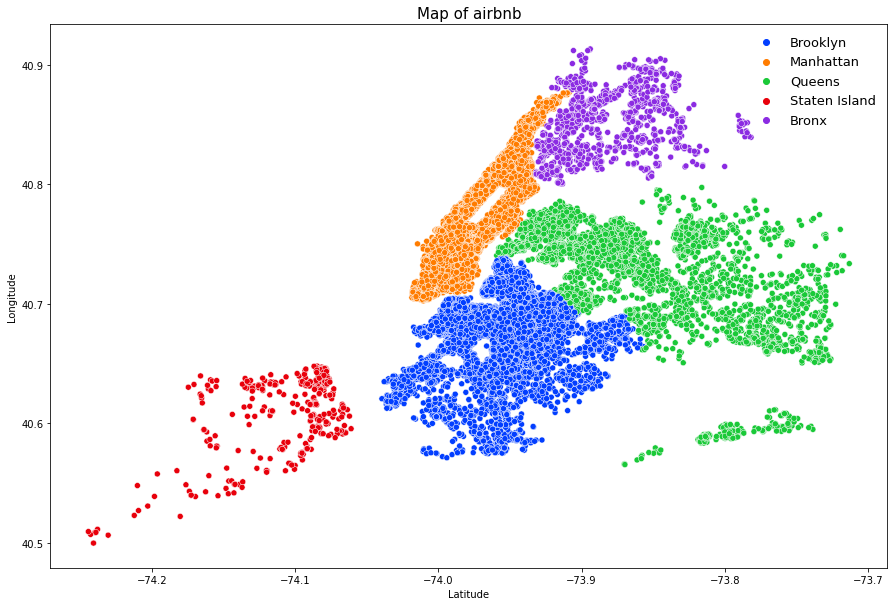

In [13]:
# Visualisation - Map of hosts

plt.figure(figsize=(15,10))
a = sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='bright')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

**Cleaning Data**

Analizing Price

In [14]:
#Removing records where prices are 0 since rented price cannot be null
l_count = df['price'] ==0
print(f'Total records removed {len(df["price"][l_count])}')
df = df[df['price'] !=0]

Total records removed 11


Analyzing minimum nights column

In [45]:
#Replacing values where minimum night is greater than 180 in airbnb database
df.loc[df.minimum_nights> 180, 'minimum_nights'] = 180

In [16]:
#Creating new dataframe with important columns for our analysis

new_df = df[['host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights',
             'number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
new_df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


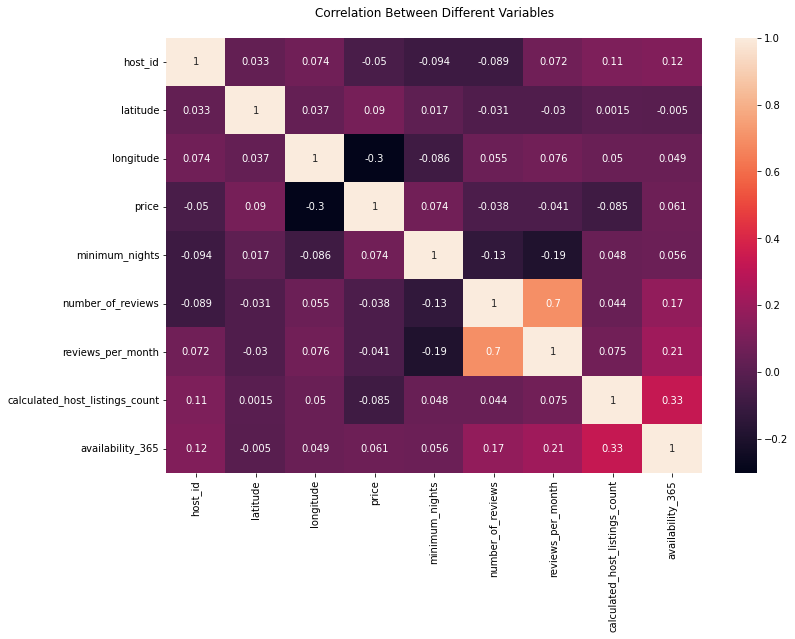

In [17]:
# Visualising the correlation between attributes
corr = new_df.corr(method='kendall')
plt.figure(figsize=(12,8))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

There is not much correlation between columns.
Only calculated host listings count and availability 365 have slight correlation

Managing Outliers

In [18]:
#Checking Outliers for price 
#USing 99th percentile value for price
p_out = new_df["price"].quantile(0.99)
p_out

799.0

In [19]:
l_count = new_df['price'] > p_out
print(f'Total values outside 99th percentile are : {len(df["price"][l_count])}')

Total values outside 99th percentile are : 474


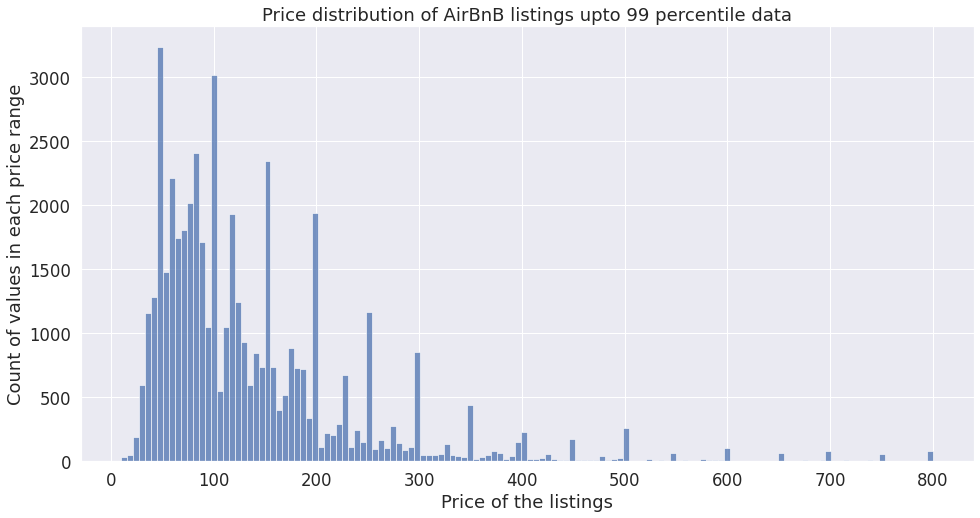

In [20]:
# Price distribution analysis considering the 99 percentile data of price
sns.set(rc={'figure.figsize':(16,8)})
sns.set(font_scale=1.5)
sns.histplot(new_df[new_df["price"]<=800]["price"],kde=False)
plt.title("Price distribution of AirBnB listings upto 99 percentile data")
plt.xlabel("Price of the listings")
plt.ylabel("Count of values in each price range")
plt.show()

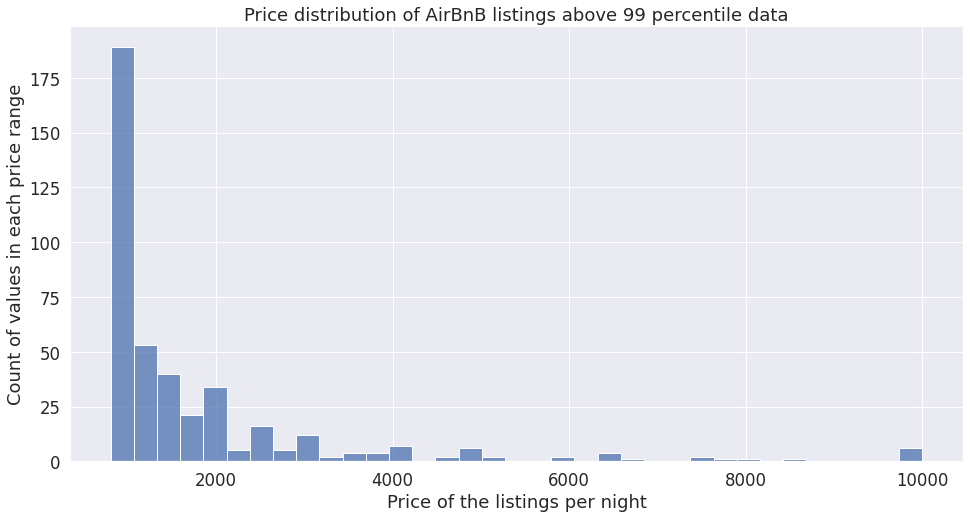

In [21]:
# Price distribution analysis considering above 99 percentile of price
sns.histplot(new_df[new_df["price"]>800]["price"],kde=False)
plt.title("Price distribution of AirBnB listings above 99 percentile data")
plt.xlabel("Price of the listings per night")
plt.ylabel("Count of values in each price range")
plt.show()

In [22]:
#Defining a new dataframe variable new_df with upto 99 percentile price distribution lisitngs
als = new_df[new_df["price"]<=np.percentile(new_df["price"],99)]
als.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48389 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48389 non-null  int64  
 1   host_name                       48389 non-null  object 
 2   neighbourhood_group             48389 non-null  object 
 3   neighbourhood                   48389 non-null  object 
 4   latitude                        48389 non-null  float64
 5   longitude                       48389 non-null  float64
 6   room_type                       48389 non-null  object 
 7   price                           48389 non-null  int64  
 8   minimum_nights                  48389 non-null  int64  
 9   number_of_reviews               48389 non-null  int64  
 10  reviews_per_month               48389 non-null  float64
 11  calculated_host_listings_count  48389 non-null  int64  
 12  availability_365                

**Working with new dataset**

Geospatial Analysis of top hosts in our dataset

In [23]:
import plotly.express as px

# Setting the DataFrame
temp = als.host_id.value_counts().reset_index().head(5)
temp.columns = ['host_id', 'count']
temp = temp.merge(als[['host_id','host_name','price', 'latitude','longitude']], left_on = 'host_id',right_on = 'host_id', how = 'left', copy = False)

# Setting up the Visualization
fig = px.scatter_mapbox(temp, 
                        lat="latitude", 
                        lon="longitude", 
                        color="host_name", 
                        size="price",
                        size_max=30, 
                        opacity = .70,
                        zoom=11,
                       )


fig.layout.mapbox.style = 'carto-positron'
fig.update_layout(title_text = 'Top 5 hosts and their hosted Locations', height = 800)

fig.show()

**Analyzing neighbourhood groups**

               neighbourhood_group  Percentage
Manhattan                    21303       44.02
Brooklyn                     19983       41.30
Queens                        5648       11.67
Bronx                         1086        2.24
Staten Island                  369        0.76


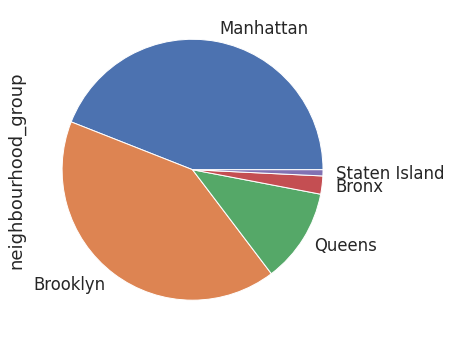

In [24]:

listings_count = pd.DataFrame(als["neighbourhood_group"].value_counts())
#Calculating the percentage of listings in each location
listings_count["Percentage"] = round((listings_count["neighbourhood_group"]/listings_count["neighbourhood_group"].sum())*100,2)
print(listings_count.head())
als.neighbourhood_group.value_counts().plot(kind='pie' , figsize=(6,6))

Based on above statistics, one can conclude that Manhattan has 44% of the total listings followed by Brooklyn 41% in New York.

Hence, we can infer that AirBnB customers have more options in Manhattan and possibility of finding an accommodation is high.

**Analyzing Neighbourhoods**

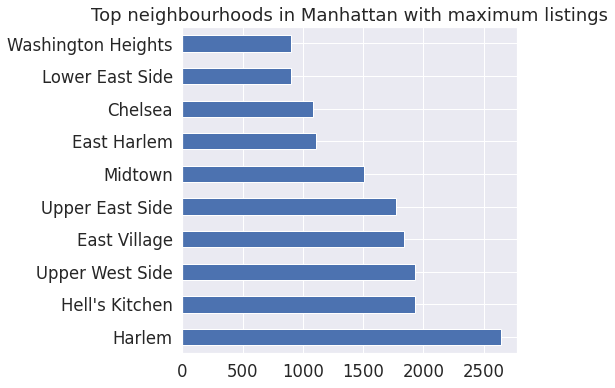

In [25]:
Title = "Top neighbourhoods in Manhattan with maximum listings"

als[als["neighbourhood_group"]=="Manhattan"]["neighbourhood"].value_counts().head(10).plot(kind='barh' , figsize=(6,6) , title=Title)

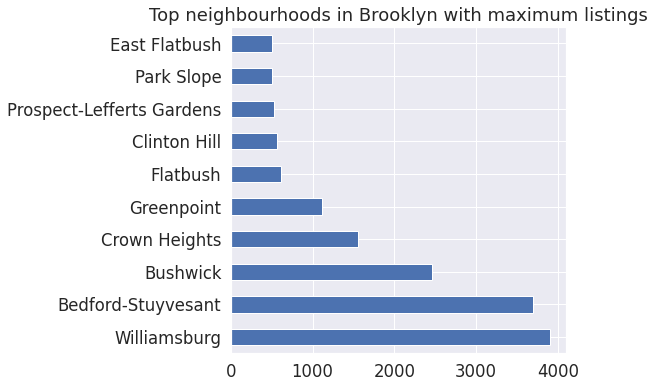

In [26]:
Title = "Top neighbourhoods in Brooklyn with maximum listings"

als[als["neighbourhood_group"]=="Brooklyn"]["neighbourhood"].value_counts().head(10).plot(kind='barh' , figsize=(6,6) , title=Title)

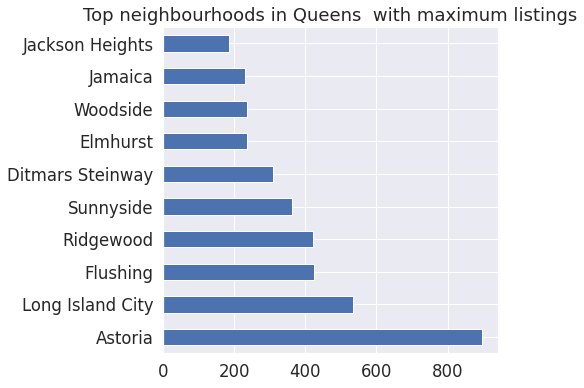

In [46]:
Title = "Top neighbourhoods in Queens  with maximum listings"

als[als["neighbourhood_group"]=="Queens"]["neighbourhood"].value_counts().head(10).plot(kind='barh' , figsize=(6,6) , title=Title)

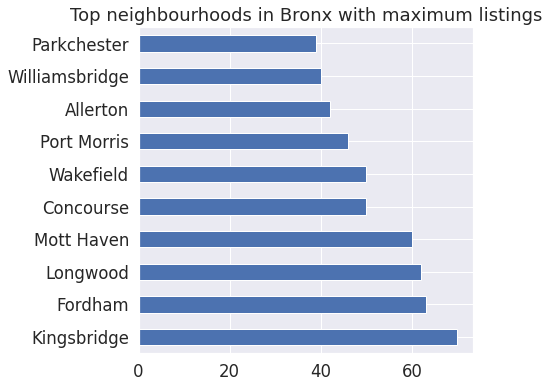

In [28]:
Title = "Top neighbourhoods in Bronx with maximum listings"

als[als["neighbourhood_group"]=="Bronx"]["neighbourhood"].value_counts().head(10).plot(kind='barh' , figsize=(6,6) , title=Title)

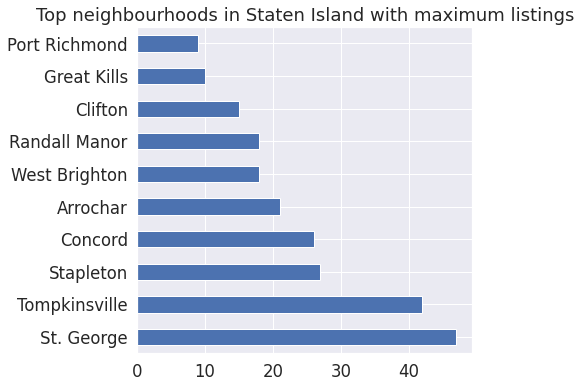

In [29]:
Title = "Top neighbourhoods in Staten Island with maximum listings"

als[als["neighbourhood_group"]=="Staten Island"]["neighbourhood"].value_counts().head(10).plot(kind='barh' , figsize=(6,6) , title=Title)

**Analyzing room types**

In [30]:

room_count = pd.DataFrame(als["room_type"].value_counts())
#Calculating the percentage of listings in each location
room_count["Percentage"] = round((room_count["room_type"]/room_count["room_type"].sum())*100,2)
room_count

,room_type,Percentage
Entire home/apt,25013,51.69
Private room,22225,45.93
Shared room,1151,2.38


Entire room/apt have maximum listings around 52% followed by private room with 46% and shared room  have minimum 2%

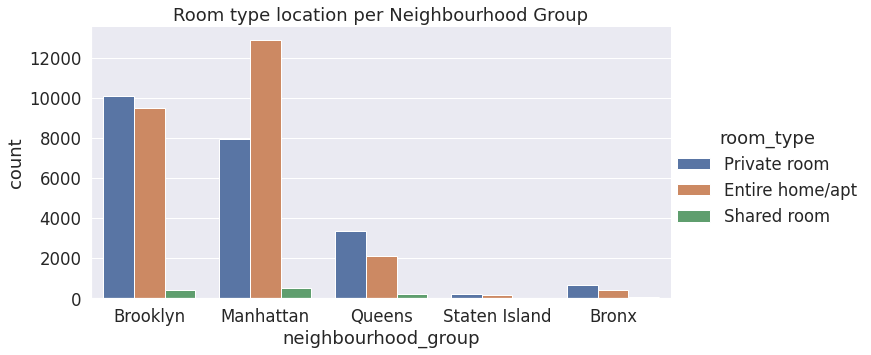

In [31]:
title = 'Room type location per Neighbourhood Group'
sns.catplot(x='neighbourhood_group', kind="count", hue="room_type", data=als, height=5, aspect=2);
plt.title(title)
plt.ioff()

In [32]:
#Relationship between neighbourhood groups and median prices

prices_df = pd.DataFrame(als.groupby(["neighbourhood_group"])['price'].agg(np.median).reset_index())

prices_df.sort_values('price',ascending=False)

,neighbourhood_group,price
2,Manhattan,149.0
1,Brooklyn,90.0
3,Queens,75.0
4,Staten Island,75.0
0,Bronx,65.0


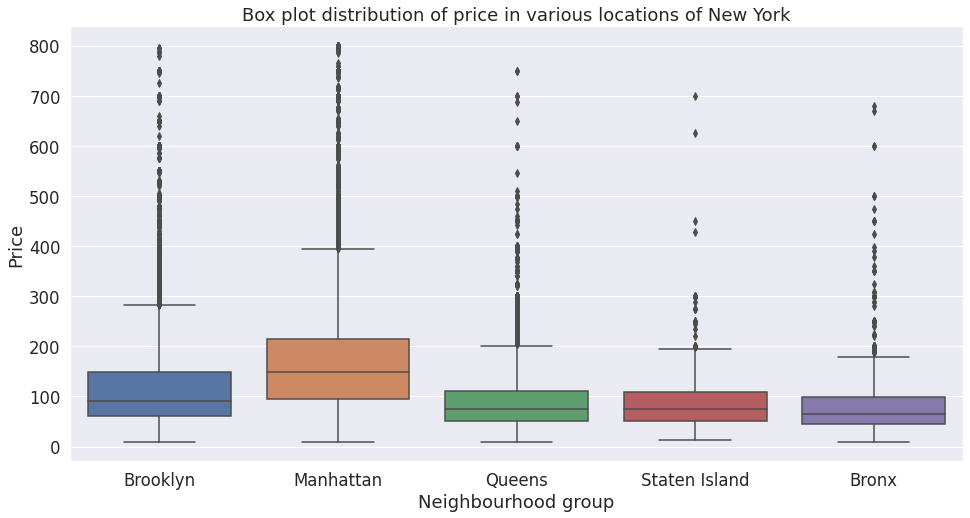

In [33]:
# Visualization of neighbourhood types with price
sns.set(font_scale=1.5)

sns.boxplot(data=als, x= "neighbourhood_group",y="price")
plt.title("Box plot distribution of price in various locations of New York")
plt.xlabel("Neighbourhood group")
plt.ylabel("Price")
plt.show()

Manahattan has the highest median prices for Airbnb listings while Bronx provides listings with lowest starting price than others

In [34]:
#Relationship between neighbourhood and prices
prices_df1 = pd.DataFrame(als.groupby(["neighbourhood"])['price'].agg(np.median).nlargest(5).sort_values(ascending=False))

prices_df1

,price
neighbourhood,
Woodrow,700.0
Tribeca,275.5
Neponsit,274.0
NoHo,250.0
Willowbrook,249.0


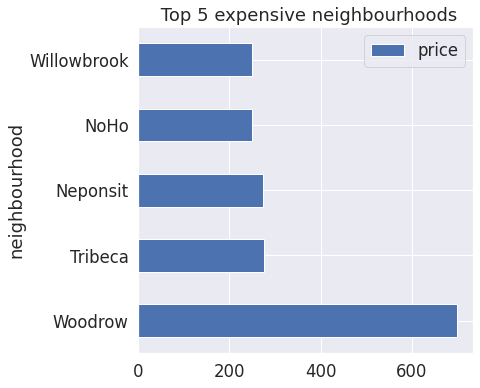

In [35]:
# Visualization
prices_df1.plot(kind = 'barh', title = ' Top 5 expensive neighbourhoods', figsize=(6,6))

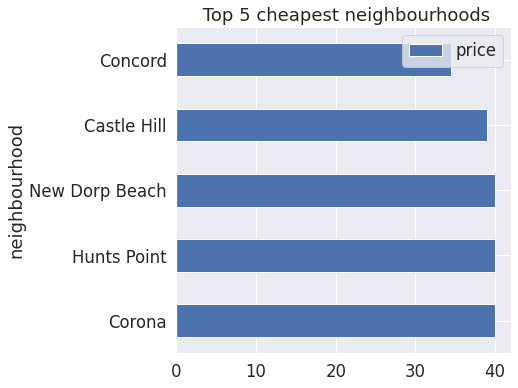

In [36]:
# Vizualization of cheapest neighbourhoods
pd.DataFrame(als.groupby(["neighbourhood"])['price'].agg(np.median).nsmallest(5).sort_values(ascending=False)).plot(
kind = 'barh', title = ' Top 5 cheapest neighbourhoods', figsize=(6,6))

**Analyzing minimum nights**

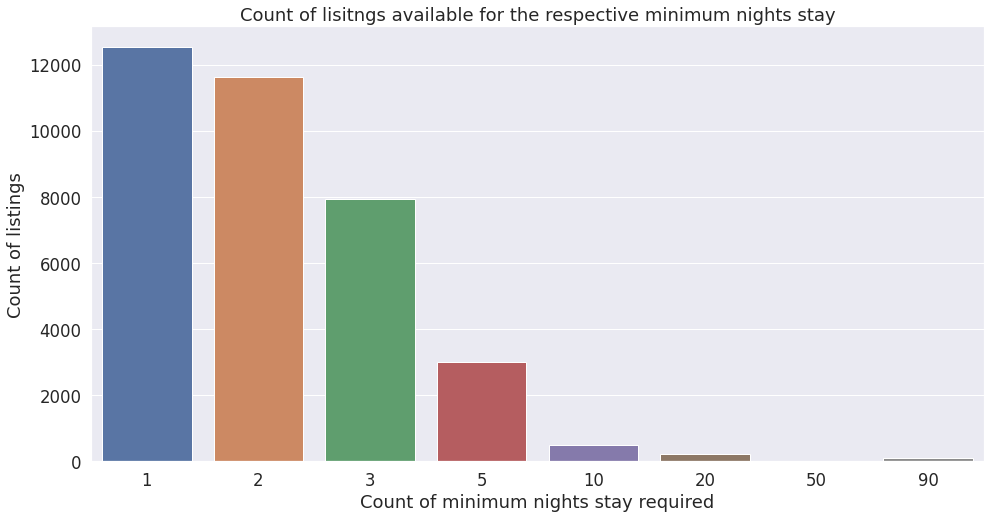

In [37]:
# Visualisation of minimum nights stay 
sns.countplot(x=als[als["minimum_nights"].isin([1,2,3,5,10,20,50,90])]["minimum_nights"])
plt.title("Count of lisitngs available for the respective minimum nights stay")
plt.xlabel("Count of minimum nights stay required")
plt.ylabel("Count of listings")
plt.show()

There are more listings available for shorter stay.

**Analyzing Reviews**

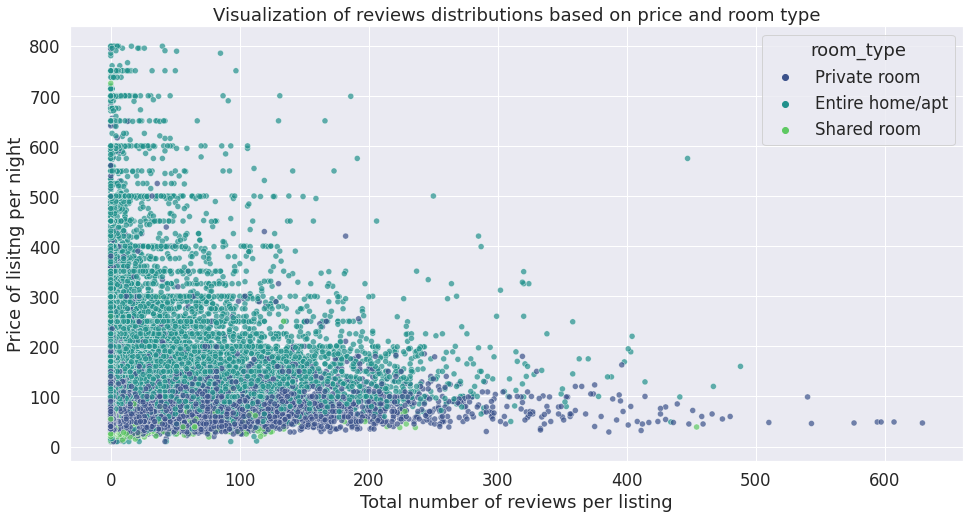

In [38]:
# Visualization of reviews distributions based on median price and room type
sns.scatterplot(data=als, x="number_of_reviews", y ="price", hue= "room_type" ,palette="viridis",alpha=0.7)
plt.title("Visualization of reviews distributions based on price and room type")
plt.xlabel("Total number of reviews per listing")
plt.ylabel("Price of lisitng per night")
plt.show()

1] Lower price listings have more number of reviews in comparison to higher cost listings.

2] Also, noticed that the lisitngs with maximum reviews per month, are the total reviews range of less than $200.

3] The listings with maximum reviews are of the type Entire home and Private room.

**Analyzing Hosts**

In [39]:
# Top ten hosts across diffent neighbourhood
busiest_hosts = als.groupby(['host_name','host_id','neighbourhood'])['reviews_per_month'].mean().reset_index().sort_values('reviews_per_month',ascending=False).head(10)

busiest_hosts

,host_name,host_id,neighbourhood,reviews_per_month
22442,Louann,228415932,Rosedale,20.940000
26943,Nalicia,156684502,Springfield Gardens,18.126667
5206,Brent,217379941,Springfield Gardens,15.780000
10020,Dona,47621202,Jamaica,13.990000
8713,Danielle,26432133,East Elmhurst,13.604000
617,Aisling,256290334,Richmond Hill,13.420000
34118,Stephanie,257832461,Bushwick,13.330000
23170,Malini,111841534,Jamaica,13.150000
4543,Ben,27287203,Upper West Side,13.130000
25270,Melissa,222098649,Jamaica,13.110000


The busiest hosts in NYC are : , Louann, Nalicia, Brent and Donna

In [40]:
# Top 10 listings with maximum reviews per month
busiest_traffic = als.groupby(['neighbourhood_group'])['reviews_per_month'].mean().reset_index().sort_values('reviews_per_month',ascending=False).head(10)

busiest_traffic

,neighbourhood_group,reviews_per_month
4,Staten Island,1.593469
3,Queens,1.570621
0,Bronx,1.478941
1,Brooklyn,1.053081
2,Manhattan,0.983633


The maximum reviews are available for Entire home followed by Private rooms.Staten Island,
Bronx and Queens have maximum reviews per month which shows that these neighbourhood are generating highest traffic.

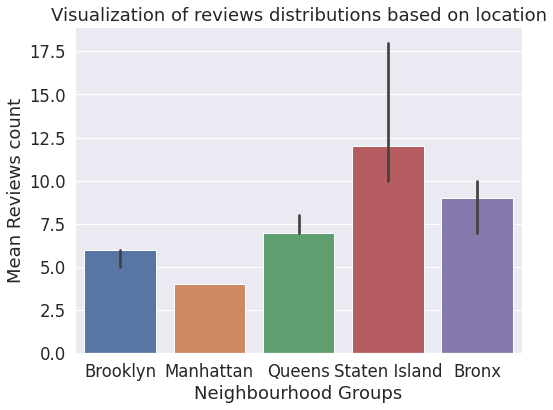

In [41]:
# Visualization of median reviews 
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(ax=ax, data=als,x= "neighbourhood_group", y="number_of_reviews",estimator=np.median)
plt.title("Visualization of reviews distributions based on location")
plt.xlabel("Neighbourhood Groups")
plt.ylabel("Mean Reviews count")
plt.show()

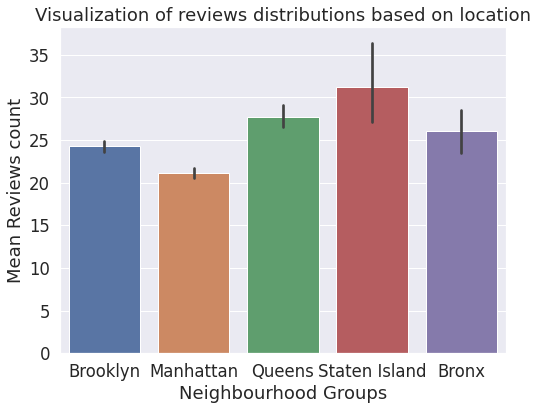

In [42]:
# Visualization of mean reviews 
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(ax=ax, data=als,x= "neighbourhood_group", y="number_of_reviews",estimator=np.mean)
plt.title("Visualization of reviews distributions based on location")
plt.xlabel("Neighbourhood Groups")
plt.ylabel("Mean Reviews count")
plt.show()

From the above two graphs, we can conclude that mean reviews is highest for Staten Island followed by Queens and Bronx.

On considering the median value, we see that Staten Island is the one which gets most reviews with high deviation and relatively all other locations get very low count of reviews.

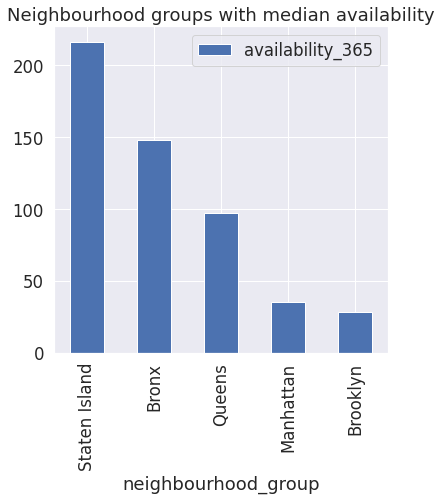

In [43]:
pd.DataFrame(als.groupby(["neighbourhood_group"])['availability_365'].agg(np.median).sort_values(ascending=False)).plot(
kind = 'bar', title = 'Neighbourhood groups with median availability', figsize=(6,6))

We can find maximum listings with availability in Staten Island and Bronx.On this basis we can coonclude that since most listing in Staten Island are available throughout the year they have most reviews. Manhattan and brooklyn provide highest listings at comparatively high cost.

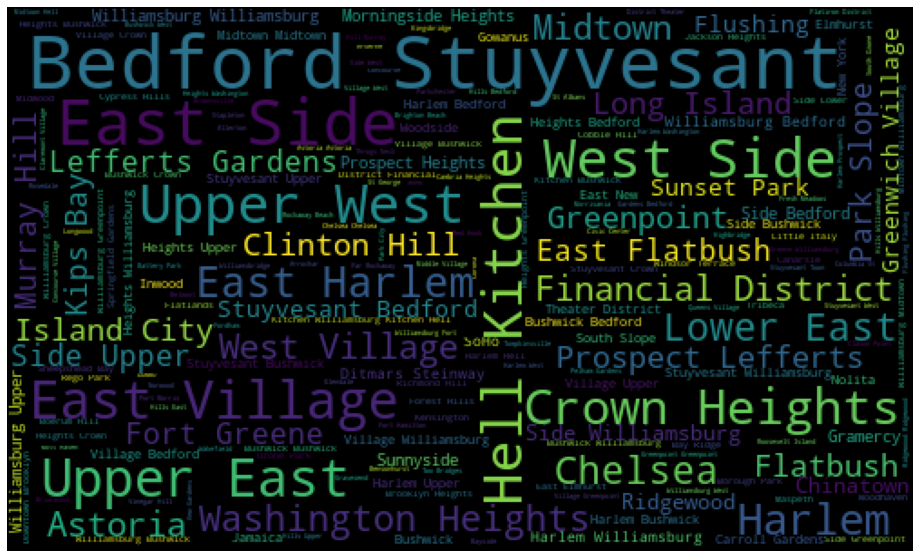

In [44]:
from wordcloud import WordCloud
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(
                          background_color='black',
                          width=500,
                          height=300
                         ).generate(" ".join(als.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

**Conclusions from the data analysis:**

I used the various data cleaning, data summary and data visualization, geo spatial visualization techniques to analyze the AirBnB listings dataset and found the following summary:

1] Manhattan has nearly 4 times the listings when compared to Queens.

2] Noticed that the price distribution is righ skewed with very few listings more costly as 5k per night.

3] The highest median price of listings are in Manhattan which is around $150 when compared to the other listings per night.

4] There are a lot of listings available for a minimum stay of 1, 2 as well as 30 days.

5] Majority of the listings are of Entire home and Private room type.

7] Most of the highly reviewed listings are present in Staten Island and Bronx. 

8] The most common words used in listing names are Bedford-Stuyvesant,East Village,East Side,Upper West,Hell Kitchen,Crown Heights